In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import StandardScaler 

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier
from itertools import product

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster import hierarchy

from sklearn.linear_model import LassoCV, Lasso
from sklearn.model_selection import train_test_split

import h2o

In [90]:
file_path_data = 'wdbc.data'
df = pd.read_csv(file_path_data, header=None, delimiter=',')
df.columns = ['ID', 'Diagnosis'] + list(df.columns[2:])
df

,ID,Diagnosis,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [27]:
# Замените 'example.names' на имя вашего файла .names
file_path_names = 'wdbc.names'

# Чтение данных из файла .names в строку
with open(file_path_names, 'r') as file:
    names_content = file.read()

# Вывести содержимое файла .names
print(names_content)


1. Title: Wisconsin Diagnostic Breast Cancer (WDBC)

2. Source Information

a) Creators: 

	Dr. William H. Wolberg, General Surgery Dept., University of
	Wisconsin,  Clinical Sciences Center, Madison, WI 53792
	wolberg@eagle.surgery.wisc.edu

	W. Nick Street, Computer Sciences Dept., University of
	Wisconsin, 1210 West Dayton St., Madison, WI 53706
	street@cs.wisc.edu  608-262-6619

	Olvi L. Mangasarian, Computer Sciences Dept., University of
	Wisconsin, 1210 West Dayton St., Madison, WI 53706
	olvi@cs.wisc.edu 

b) Donor: Nick Street

c) Date: November 1995

3. Past Usage:

first usage:

	W.N. Street, W.H. Wolberg and O.L. Mangasarian 
	Nuclear feature extraction for breast tumor diagnosis.
	IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science
	and Technology, volume 1905, pages 861-870, San Jose, CA, 1993.

OR literature:

	O.L. Mangasarian, W.N. Street and W.H. Wolberg. 
	Breast cancer diagnosis and prognosis via linear programming. 
	Operations Research, 43(4), pag

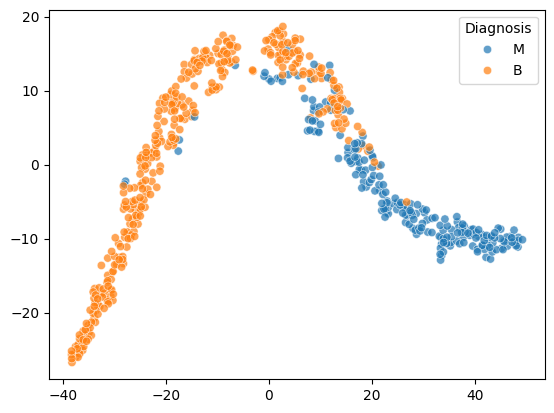

In [91]:
X = df.drop(columns=['ID', 'Diagnosis'])
y = df['Diagnosis']
X_emb = TSNE(n_components=2).fit_transform(X)

sns.scatterplot(x=X_emb[:,0], y=X_emb[:,1], hue=y, alpha=0.7)

df['Diagnosis'] = df['Diagnosis'].replace({'M': 1, 'B': 0})

Размер тестовой выборки: 10% Ошибка классификации: 0.0175
Размер тестовой выборки: 15% Ошибка классификации: 0.0465
Размер тестовой выборки: 20% Ошибка классификации: 0.0263
Размер тестовой выборки: 25% Ошибка классификации: 0.0420
Размер тестовой выборки: 30% Ошибка классификации: 0.0585
Размер тестовой выборки: 35% Ошибка классификации: 0.0500
Размер тестовой выборки: 40% Ошибка классификации: 0.0482
Размер тестовой выборки: 45% Ошибка классификации: 0.0506
Размер тестовой выборки: 50% Ошибка классификации: 0.0561
Размер тестовой выборки: 55% Ошибка классификации: 0.0543
Размер тестовой выборки: 60% Ошибка классификации: 0.0526
Размер тестовой выборки: 65% Ошибка классификации: 0.0649
Размер тестовой выборки: 70% Ошибка классификации: 0.0677
Размер тестовой выборки: 75% Ошибка классификации: 0.0656
Размер тестовой выборки: 80% Ошибка классификации: 0.0680
Размер тестовой выборки: 85% Ошибка классификации: 0.0682
Размер тестовой выборки: 90% Ошибка классификации: 0.0604
Размер тестово

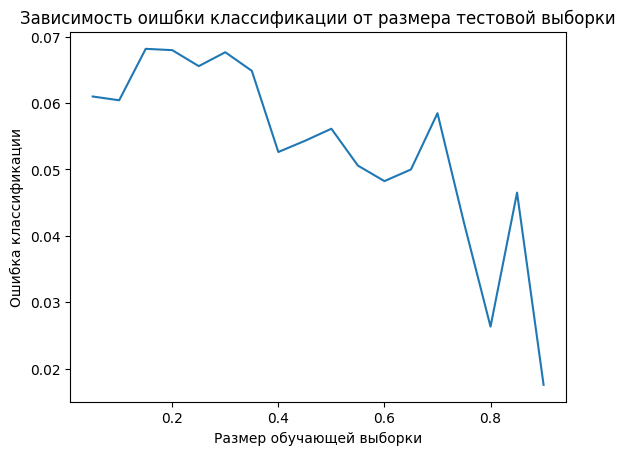

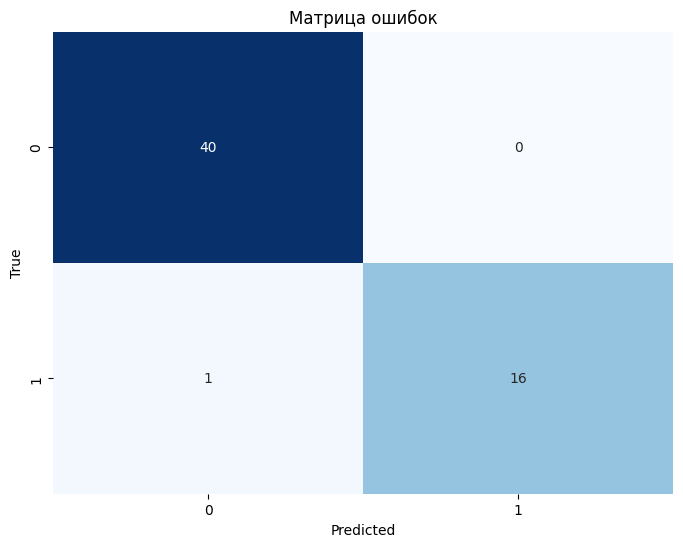

In [92]:
def train_and_evaluate(test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    nb_classifier = GaussianNB()
    nb_classifier.fit(X_train, y_train)

    y_pred = nb_classifier.predict(X_test)
    error_rate = np.mean(y_pred != y_test)

    return error_rate, nb_classifier, X_test, y_test, y_pred

test_sizes = np.arange(0.1, 1.0, 0.05)

error_rates = []
best_model = None
best_error_rate = float('inf')

for test_size in test_sizes:
    error_rate, model, X_test, y_test, y_pred = train_and_evaluate(test_size)
    error_rates.append(error_rate)

    if error_rate < best_error_rate:
        best_error_rate = error_rate
        best_model = model
        best_X_test = X_test
        best_y_test = y_test
        best_y_pred = y_pred

for i, test_size in enumerate(test_sizes):
    print(f'Размер тестовой выборки: {test_size * 100:.0f}% Ошибка классификации: {error_rates[i]:.4f}')

plt.plot(1-test_sizes, error_rates)
plt.title('Зависимость оишбки классификации от размера тестовой выборки')
plt.xlabel('Размер обучающей выборки')
plt.ylabel('Ошибка классификации')
plt.show()

# tsne = TSNE(n_components=2)
# X_test_tsne = tsne.fit_transform(best_X_test)

# fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# sns.scatterplot(x=X_test_tsne[:, 0], y=X_test_tsne[:, 1], hue=best_y_test, alpha=0.7, ax=axes[0])
# axes[0].set_title('True Data')
# axes[0].legend(loc='best')

# sns.scatterplot(x=X_test_tsne[:, 0], y=X_test_tsne[:, 1], hue=best_y_pred, alpha=0.7, ax=axes[1])
# axes[1].set_title('Predicted Data')
# axes[1].legend(loc='best')

# plt.show()

conf_matrix = confusion_matrix(best_y_test, best_model.predict(best_X_test))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Матрица ошибок')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Определение сетки параметров для перебора
k_values = list(range(1, 11))
kernel_values = ["uniform", "distance"]
distance_values = list(range(1, 11))
metric_values = ["euclidean", "manhattan", "chebyshev"]  # Добавим выбор метрики

best_accuracy = 0
best_params = {}

# Цикл для подбора оптимальных параметров
for k, kernel, distance, metric in product(k_values, kernel_values, distance_values, metric_values):
    model = KNeighborsClassifier(n_neighbors=k, weights=kernel, p=distance, metric=metric)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy = (pred == y_test).mean()

    # Сохранение лучших параметров
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = {'k': k, 'kernel': kernel, 'distance': distance, 'metric': metric}

# Использование наилучших параметров для классификации
best_model = KNeighborsClassifier(n_neighbors=best_params['k'],
                                   weights=best_params['kernel'],
                                   p=best_params['distance'],
                                   metric=best_params['metric'])
best_model.fit(X_train, y_train)
pred = best_model.predict(X_test)

# Оценка точности модели на тестовых данных с лучшими параметрами
final_accuracy = (pred == y_test).mean()
print(f"Точность лучшей модели: {final_accuracy:.4f}")
print("Лучшие параметры:")
print(best_params)


Точность лучшей модели: 0.9211
Лучшие параметры:
{'k': 3, 'kernel': 'uniform', 'distance': 1, 'metric': 'euclidean'}


In [85]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Преобразование целевой переменной в категориальный тип
y_train = y_train.astype('category')
y_test = y_test.astype('category')

# Определение диапазона числа деревьев для перебора
tree_num = np.arange(1, 102, 5)
error_boost = []

for t in tree_num:
    err_boost = []
    for i in range(5):
        clf = AdaBoostClassifier(n_estimators=t, random_state=i)
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        err_boost.append(1 - accuracy_score(y_test, pred))

    error_boost.append(np.mean(err_boost))

# Вывод средней ошибки и ошибок для каждого числа деревьев
print("Средняя ошибка:", np.mean(error_boost))
print("Ошибки для каждого числа деревьев:", error_boost)




Средняя ошибка: 0.038847117794486206
Ошибки для каждого числа деревьев: [0.1228070175438597, 0.06140350877192979, 0.06140350877192979, 0.052631578947368474, 0.03508771929824561, 0.03508771929824561, 0.02631578947368418, 0.02631578947368418, 0.02631578947368418, 0.02631578947368418, 0.03508771929824561, 0.04385964912280704, 0.03508771929824561, 0.02631578947368418, 0.02631578947368418, 0.03508771929824561, 0.03508771929824561, 0.02631578947368418, 0.02631578947368418, 0.02631578947368418, 0.02631578947368418]


Число деревьев: 1, Ошибка: 0.1228
Число деревьев: 6, Ошибка: 0.0614
Число деревьев: 11, Ошибка: 0.0614
Число деревьев: 16, Ошибка: 0.0526
Число деревьев: 21, Ошибка: 0.0351
Число деревьев: 26, Ошибка: 0.0351
Число деревьев: 31, Ошибка: 0.0263
Число деревьев: 36, Ошибка: 0.0263
Число деревьев: 41, Ошибка: 0.0263
Число деревьев: 46, Ошибка: 0.0263
Число деревьев: 51, Ошибка: 0.0351
Число деревьев: 56, Ошибка: 0.0439
Число деревьев: 61, Ошибка: 0.0351
Число деревьев: 66, Ошибка: 0.0263
Число деревьев: 71, Ошибка: 0.0263
Число деревьев: 76, Ошибка: 0.0351
Число деревьев: 81, Ошибка: 0.0351
Число деревьев: 86, Ошибка: 0.0263
Число деревьев: 91, Ошибка: 0.0263
Число деревьев: 96, Ошибка: 0.0263
Число деревьев: 101, Ошибка: 0.0263


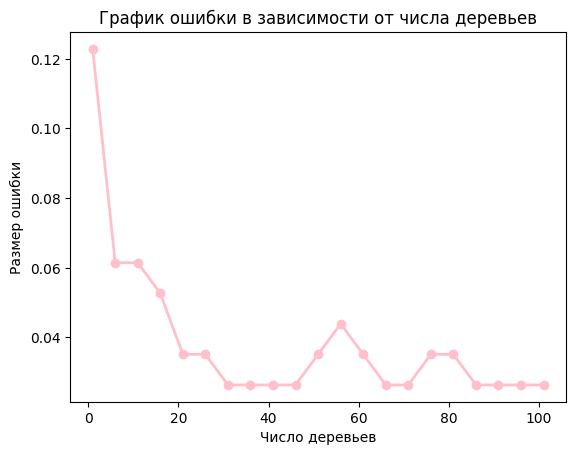

In [81]:


# Преобразование целевой переменной в категориальный тип
y_train = y_train.astype('category')
y_test = y_test.astype('category')

# Определение диапазона числа деревьев для перебора
tree_num = np.arange(1, 102, 5)
error_boost = []

for t in tree_num:
    err_boost = []
    for i in range(4):
        clf = AdaBoostClassifier(n_estimators=t, random_state=i)
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        err_boost.append(1 - accuracy_score(y_test, pred))

    mean_error = np.mean(err_boost)
    print(f"Число деревьев: {t}, Ошибка: {mean_error:.4f}")
    error_boost.append(mean_error)




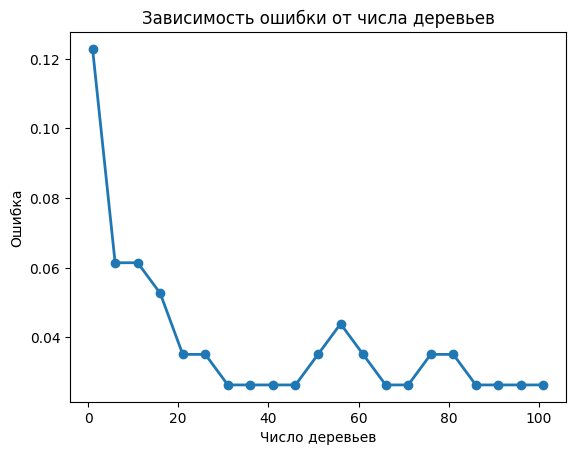

In [86]:
# Построение графика
plt.plot(tree_num, error_boost, marker='o', linestyle='-', linewidth=2)
plt.xlabel("Число деревьев")
plt.ylabel("Ошибка")
plt.title("Зависимость ошибки от числа деревьев")
plt.show()

/usr/local/Cellar/jupyterlab/4.0.9_2/libexec/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Error (k-means): 17.75%


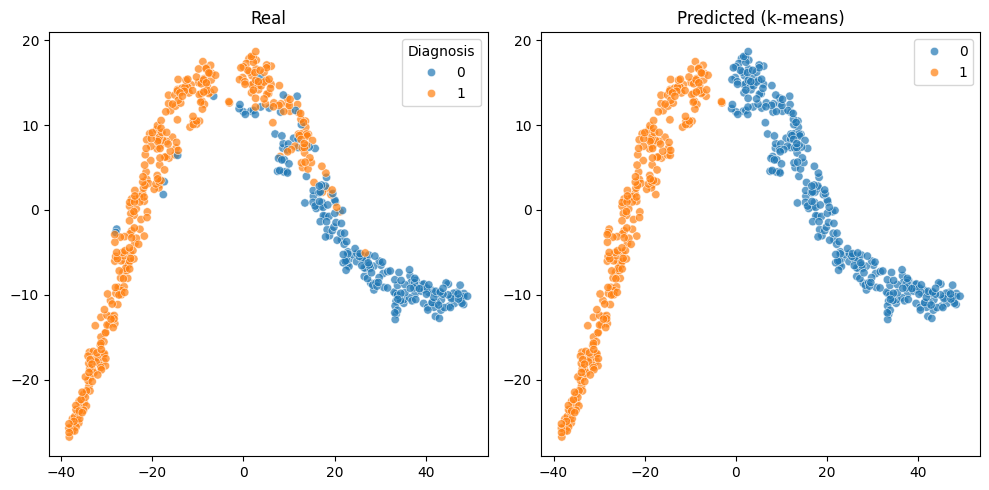

In [167]:


file_path_data = 'wdbc.data'
df = pd.read_csv(file_path_data, header=None, delimiter=',')
df.columns = ['ID', 'Diagnosis'] + list(df.columns[2:])
df['Diagnosis'] = df['Diagnosis'].replace({'M': 0, 'B': 1})
X = df.drop(columns=['ID', 'Diagnosis'])
y = df['Diagnosis']
X_emb = TSNE(n_components=2).fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=123)
predict_kmeans = kmeans.fit_predict(X_emb)

errors_kmeans = (predict_kmeans != y).sum() / len(y)
print(f'Error (k-means): {errors_kmeans * 100:.2f}%')

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.scatterplot(ax=ax[0], x=X_emb[:, 0], y=X_emb[:, 1], hue=y, alpha=0.7)
ax[0].set_title('Real')

sns.scatterplot(ax=ax[1], x=X_emb[:, 0], y=X_emb[:, 1], hue=predict_kmeans, alpha=0.7)
ax[1].set_title('Predicted (k-means)')

fig.tight_layout()
plt.show()


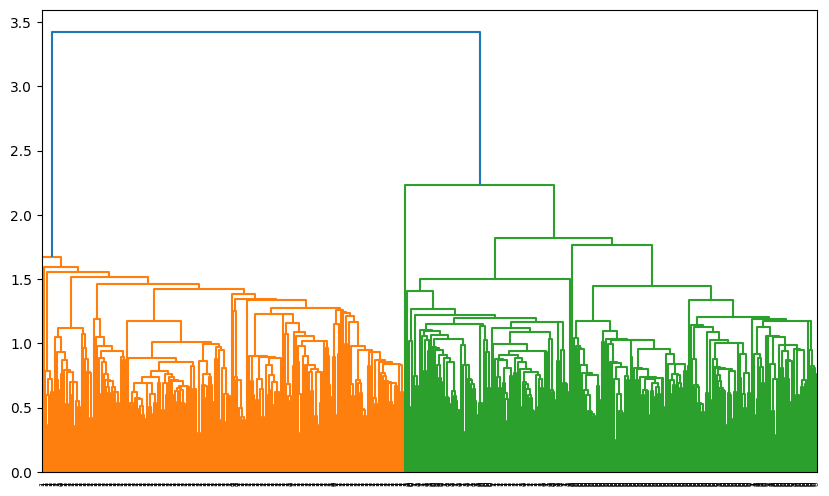

In [108]:


# Вычисление матрицы расстояний
distance_matrix = hierarchy.distance.pdist(X_emb)

# Иерархическая кластеризация и построение дендрограммы
linkage_matrix = hierarchy.linkage(distance_matrix, method='single')
plt.figure(figsize=(10, 6))
dendrogram = hierarchy.dendrogram(linkage_matrix, labels=y.values)
plt.show()

In [119]:
# Fit LassoCV to find the optimal alpha
lasso_cv = LassoCV(cv=100, random_state=25)
lasso_cv.fit(X, y)
optimal_alpha = lasso_cv.alpha_
print(optimal_alpha)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=25)

# Fit Lasso with the optimal alpha on the training data
lasso_model = Lasso(alpha=optimal_alpha, random_state=25)
lasso_model.fit(x_train, y_train)

# Print coefficients along with feature names
# Вывод отсортированных по важности признаков
sorted_features = sorted(zip(lasso_model.coef_, X.columns), key=lambda x: abs(x[0]), reverse=True)
for coef, feature_name in sorted_features:
    print(f'{feature_name}: {coef}')


0.20182966045941297
24: -0.01722542007689195
23: -0.009316291206868348
5: 0.00027406599763508586
25: 0.00022317437451938155
2: -0.0
3: -0.0
4: -0.0
6: -0.0
7: -0.0
8: -0.0
9: -0.0
10: -0.0
11: -0.0
12: -0.0
13: -0.0
14: -0.0
15: 0.0
16: -0.0
17: -0.0
18: -0.0
19: -0.0
20: -0.0
21: -0.0
22: -0.0
26: -0.0
27: -0.0
28: -0.0
29: -0.0
30: -0.0
31: -0.0


In [120]:
df

,ID,Diagnosis,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,14 mins 24 secs
H2O_cluster_timezone:,Europe/Moscow
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,27 days
H2O_cluster_name:,H2O_from_python_vladaefremenko_mmcw48
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.987 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


,ID,Diagnosis,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
type,int,enum,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real
mins,8915.0,,7.729,10.82,47.98,178.8,0.06251,0.01938,0.0,0.0,0.1203,0.05024,0.1153,0.3628,0.757,6.802,0.001713,0.002252,0.0,0.0,0.007882,0.0008948,8.964,14.1,57.17,242.2,0.07117,0.02729,0.0,0.0,0.1565,0.05504
mean,42272191.06741573,,14.102404494382032,19.276629213483147,91.79735955056174,654.3140449438201,0.09545410112359547,0.10215039325842695,0.08480856179775279,0.046728426966292126,0.179591011235955,0.06266640449438207,0.40562865168539325,1.2058016853932585,2.889982584269664,41.2855617977528,0.00675060112359551,0.025133550561797748,0.030536438202247187,0.011446106741573037,0.020019033707865175,0.003716501685393258,16.28500561797752,25.863426966292135,107.53028089887641,888.3016853932581,0.13124910112359547,0.25165370786516855,0.2696525112359551,0.1119528595505618,0.2875404494382023,0.08378623595505623
maxs,911296202.0,,27.42,33.56,186.9,2501.0,0.1335,0.3454,0.4264,0.1823,0.2906,0.09575,2.547,4.885,18.65,542.2,0.02177,0.09368,0.1197,0.0409,0.07895,0.02193,36.04,49.54,251.2,4254.0,0.2006,0.8681,0.9608,0.291,0.544,0.1431
sigma,162617487.43898246,,3.5333725465869064,4.205297558634331,24.488485413503916,354.325002704774,0.013640063808973917,0.053877028052982605,0.08220711899244813,0.03858247304983868,0.028566693262318185,0.007090050998229407,0.29493217437154545,0.5444749018069688,2.1900766214132967,51.504909863689505,0.0028086402249923466,0.017395125799225353,0.023214707623734607,0.005927787642381822,0.008255256831546159,0.002571154338101104,4.9164787666830305,6.003660187517138,34.47933180021877,599.7311948217643,0.02233059992415714,0.1518413125034957,0.2122232448597317,0.06454636623772317,0.06043266546466486,0.01661350736584115
zeros,0,,0,0,0,0,0,0,4,4,0,0,0,0,0,0,0,0,4,4,0,0,0,0,0,0,0,0,4,4,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,845636.0,0,16.02,23.24,102.7,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,0.3795,1.187,2.466,40.51,0.004029,0.009269,0.01101,0.007591,0.0146,0.003042,19.19,33.88,123.8,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452
1,846226.0,0,19.17,24.8,132.4,1123.0,0.0974,0.2458,0.2065,0.1118,0.2397,0.078,0.9555,3.568,11.07,116.2,0.003139,0.08297,0.0889,0.0409,0.04484,0.01284,20.96,29.94,151.7,1332.0,0.1037,0.3903,0.3639,0.1767,0.3176,0.1023
2,84667401.0,0,13.73,22.61,93.6,578.3,0.1131,0.2293,0.2128,0.08025,0.2069,0.07682,0.2121,1.169,2.061,19.21,0.006429,0.05936,0.05501,0.01628,0.01961,0.008093,15.03,32.01,108.8,697.7,0.1651,0.7725,0.6943,0.2208,0.3596,0.1431


deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
deepfeatures progress: |

/usr/local/Cellar/jupyterlab/4.0.9_2/libexec/lib/python3.12/site-packages/h2o/frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


█████████████████████████████████████████████████████████| (done) 100%


/usr/local/Cellar/jupyterlab/4.0.9_2/libexec/lib/python3.12/site-packages/h2o/frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Error: 0.021621621621621623


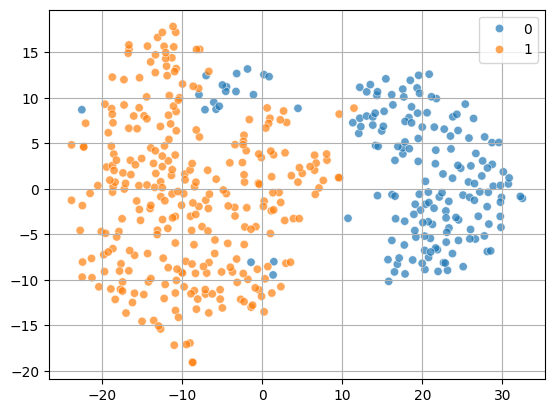

In [131]:

data = h2o.H2OFrame(df)
data['Diagnosis'] = data['Diagnosis'].asfactor()
train, val = data.split_frame([0.8])

predictors = [f"{i}" for i in range(2, 32)]
response = "Diagnosis"

mdl = H2ODeepLearningEstimator(activation='tanh', autoencoder=True)
mdl.train(predictors, response, training_frame=train)

features = mdl.deepfeatures(train, layer=1)
x_new = features.as_data_frame()
y_new = train[response].as_data_frame().values.reshape(1, -1)
emb = TSNE(n_components=2).fit_transform(x_new)

x_train, x_test, y_train, y_test = train_test_split(x_new, y_new[0], test_size=0.8, stratify=a[0], random_state=25)
Ada_model = AdaBoostClassifier(n_estimators=31).fit(x_train, y_train)
y_pred = Ada_model.predict(x_test)
print(f'Ошибка: {(y_pred != y_test).sum()/len(y_test)}')



<Axes: >

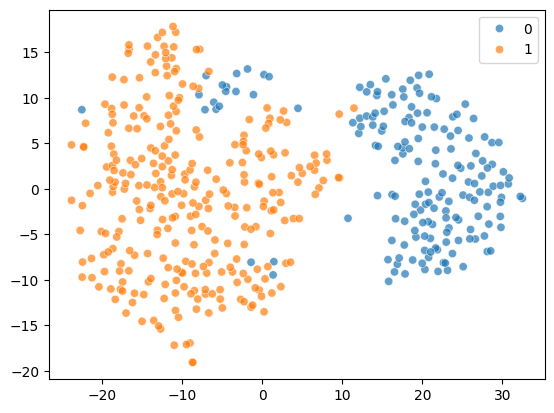

In [132]:
sns.scatterplot(x=emb[:,0], y=emb[:,1], hue=a[0], alpha=0.7)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
deepfeatures progress: |█████████████████████████████████████████████████████████| (done) 100%


/usr/local/Cellar/jupyterlab/4.0.9_2/libexec/lib/python3.12/site-packages/h2o/frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Error: 0.010752688172043012


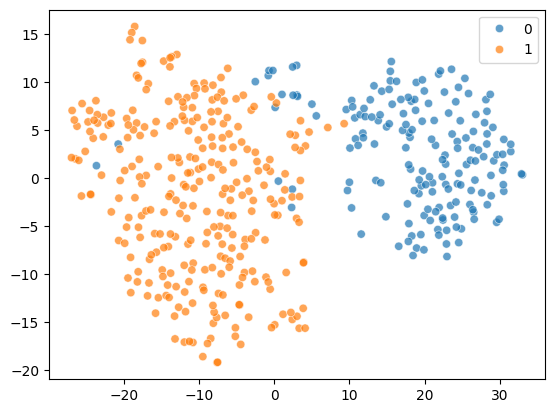

In [134]:

mdl = H2ODeepLearningEstimator(activation='tanh', autoencoder=True, hidden=[500,500])
mdl.train(predictors, response, training_frame=train)

features = mdl1.deepfeatures(train, layer=1)
x_new = features.as_data_frame()
emb = TSNE(n_components=2).fit_transform(x_new)

sns.scatterplot(x=emb[:,0], y=emb[:,1], hue=y_new[0], alpha=0.7)

x_train, x_test, y_train, y_test = train_test_split(x_new, y_new[0], test_size=0.2, stratify=y_new[0], random_state=25)
Ada_model = AdaBoostClassifier(n_estimators=31).fit(x_train, y_train)
y_pred = Ada_model.predict(x_test)
print(f'Error: {(y_pred != y_test).sum()/len(y_test)}')




Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
deepfeatures progress: |█████████████████████████████████████████████████████████| (done) 100%


/usr/local/Cellar/jupyterlab/4.0.9_2/libexec/lib/python3.12/site-packages/h2o/frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/Cellar/jupyterlab/4.0.9_2/libexec/lib/python3.12/site-packages/h2o/frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Error: 0.08771929824561403


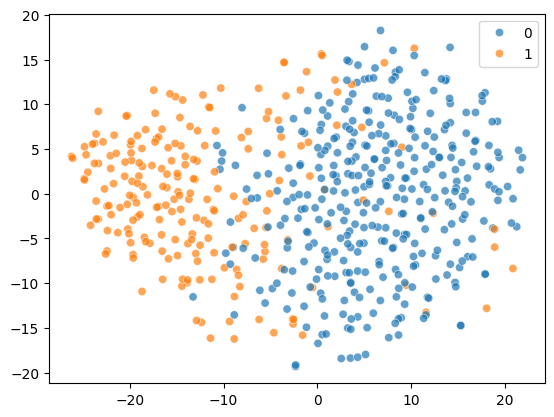

In [182]:
df = pd.read_csv(file_path_data, header=None, delimiter=',')
df.columns = ['ID', 'Diagnosis'] + list(df.columns[2:])
df['Diagnosis'] = df['Diagnosis'].replace({'M': 1, 'B': 0})

X = df.drop(columns=['ID', 'Diagnosis'])
y = df['Diagnosis'].tolist()
#X_emb = TSNE(n_components=2).fit_transform(X)

train = h2o.H2OFrame(X + np.random.normal(0, 1, size=(569, 30)))
y = h2o.H2OFrame(y)

train = train.cbind(y)

mdl1 = H2ODeepLearningEstimator(activation='tanh', autoencoder=True)
mdl1.train(predictors, response, training_frame=train, validation_frame=val)
featurs = mdl1.deepfeatures(train, layer=1)
a = train['C1'].as_data_frame().values.reshape(1, -1)
data_new = featurs.as_data_frame()
emb = TSNE(n_components=2).fit_transform(data_new)

sns.scatterplot(x=emb[:,0], y=emb[:,1], hue=a[0],alpha=0.7)

x_train, x_test, y_train, y_test = train_test_split(data_new, a[0], test_size=0.2, stratify=a[0], random_state=25)
bag_model = AdaBoostClassifier(n_estimators=31).fit(x_train, y_train)
predict2 = bag_model.predict(x_test)
print(f'Error: {(predict2 != y_test).sum()/len(y_test)}')

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,2 hours 30 mins
H2O_cluster_timezone:,Europe/Moscow
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,27 days
H2O_cluster_name:,H2O_from_python_vladaefremenko_mmcw48
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.943 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
deepfeatures progress: |█████████████████████████████████████████████████████████| (done) 100%


/usr/local/Cellar/jupyterlab/4.0.9_2/libexec/lib/python3.12/site-packages/h2o/frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/Cellar/jupyterlab/4.0.9_2/libexec/lib/python3.12/site-packages/h2o/frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


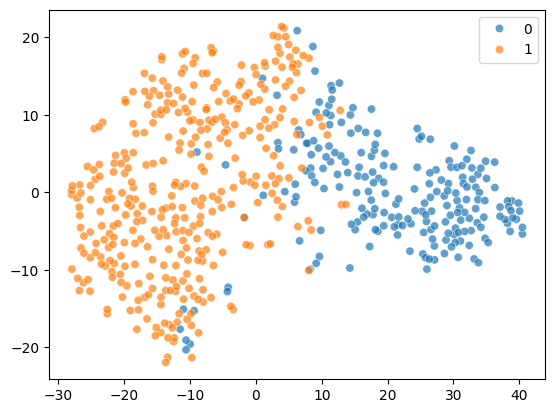

Error: 0.05263157894736842


In [195]:

# Часть данных которая будет зашумлена
subset_size = 100
subset_indices = np.random.choice(df.shape[0], size=subset_size, replace=False)

X = df.drop(columns=['ID', 'Diagnosis'])
y = df['Diagnosis'].tolist()
X_subset = X.iloc[subset_indices]
y_subset = [y[i] for i in subset_indices]

noise_subset = np.random.normal(0, 1, size=(subset_size, X.shape[1]))
X_subset_with_noise = X_subset + noise_subset

X_with_noise = X.copy()
X_with_noise.iloc[subset_indices] = X_subset_with_noise

train = h2o.H2OFrame(pd.concat([X_with_noise, pd.Series(y, name='Diagnosis')], axis=1))

mdl1 = H2ODeepLearningEstimator(activation='tanh', autoencoder=True)
mdl1.train(predictors, response, training_frame=train, validation_frame=val)

features = mdl1.deepfeatures(train, layer=1)
a = train['Diagnosis'].as_data_frame().values.reshape(1, -1)
data_new = features.as_data_frame()
emb = TSNE(n_components=2).fit_transform(data_new)

sns.scatterplot(x=emb[:, 0], y=emb[:, 1], hue=a[0], alpha=0.7)
plt.show()

x_train, x_test, y_train, y_test = train_test_split(data_new, a[0], test_size=0.2, stratify=a[0], random_state=25)

bag_model = AdaBoostClassifier(n_estimators=31).fit(x_train, y_train)
predict2 = bag_model.predict(x_test)
print(f'Error: {(predict2 != y_test).sum()/len(y_test)}')
